In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Remove name, ticket, id (no relevance), cabin (missing values)

In [3]:
data1 = raw_data.drop(['Name'], axis = 1)

In [4]:
data2 = data1.drop(['Ticket'], axis = 1)

In [5]:
data3 = data2.drop(['Cabin'], axis = 1)

In [6]:
data4 = data3.drop(['PassengerId'], axis = 1)

In [7]:
data4.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


Delete missing values in Embarked

In [8]:
data_drop_missing = data4.dropna(subset=['Embarked'])

Replace missing values in Age with average age

In [9]:
average_age = data_drop_missing['Age'].mean()
average_age

29.64209269662921

In [10]:
data_fix_age = data_drop_missing.fillna(average_age)

In [11]:
data_fix_age.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.642093,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,12.968346,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,29.642093,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


Create dummy variables for Pclass, Sex, Embarked

In [12]:
data_dummies = data_fix_age.copy()

In [13]:
#map Pclass to class descriptors
data_dummies['Pclass'] = data_dummies['Pclass'].map({1.0:'First', 2.0:'Second', 3.0:'Third'})
data_dummies

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Third,male,22.000000,1,0,7.2500,S
1,1,First,female,38.000000,1,0,71.2833,C
2,1,Third,female,26.000000,0,0,7.9250,S
3,1,First,female,35.000000,1,0,53.1000,S
4,0,Third,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,Second,male,27.000000,0,0,13.0000,S
887,1,First,female,19.000000,0,0,30.0000,S
888,0,Third,female,29.642093,1,2,23.4500,S
889,1,First,male,26.000000,0,0,30.0000,C


In [14]:
data_dummies = pd.get_dummies(data_dummies, drop_first=True)

In [15]:
data_dummies.describe(include = 'all')

,Survived,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.642093,0.524184,0.382452,32.096681,0.206974,0.552306,0.649044,0.086614,0.724409
std,0.486260,12.968346,1.103705,0.806761,49.697504,0.405365,0.497536,0.477538,0.281427,0.447063
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data = data_dummies

In [17]:
y = data['Survived']
x1 = data.drop(['Survived'], axis = 1)

In [18]:
#Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x1
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [19]:
vif

,VIF,features
0,4.476272,Age
1,1.567405,SibSp
2,1.626730,Parch
3,1.821690,Fare
4,1.941645,Pclass_Second
5,3.759075,Pclass_Third
6,3.059828,Sex_male
7,1.579267,Embarked_Q
8,4.856162,Embarked_S


Acceptable lack of multicollinearity

Check relationships between variables

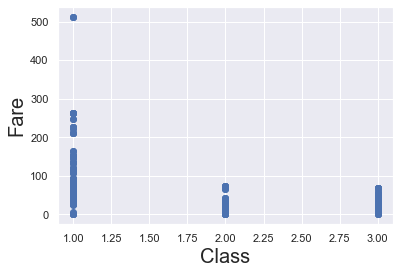

In [20]:
plt.scatter(data_fix_age['Pclass'], data['Fare'], color = 'C0')
plt.xlabel('Class', fontsize = 20)
plt.ylabel('Fare', fontsize = 20)
plt.show()

No clear relationship between fare and class

In [21]:
#Perform regression
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.440808
         Iterations 6


In [22]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                  0.3374
Time:                        13:08:26   Log-Likelihood:                -391.88
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.172e-80
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1016      0.476      8.613      0.000       3.168       5.035
Age              -0.0393      0.008     -4.983      0.000      -0.055      -0.024
SibSp            -0.3221      0.110     -2.941      0.003      -0.537      -0.107
Parch            -0.0949      0.119     -0.798      0.425      -0.328       0.138
Fare              0.0023      0.002      0.919      0.358      -0.003       0.007
Pclass_Second    -0.9237      0.298     -3.101      0.002      -1.507      -0.340
Pclass_Third     -2.1495      0.298     -7.219      0.000      -2.733      -1.566
Sex_male         -2.7096      0.201    -13.459      0.000      -3.104      -2.315
Embarked_Q       -0.0308      0.382     -0.081      0.936      -0.779       0.717
Embarked_S       -0.4456      0.240     -1.859      0.063      -0.915       0.024
=================================================================================
"""

In [23]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [24]:
confusion_matrix(x,y, results_log)

(array([[477.,  72.],
        [102., 238.]]),
 0.8042744656917885)

Apply model to test data

In [25]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Format test data to match model

In [26]:
data1_test = test.drop(['Name'], axis = 1)

In [27]:
data2_test = data1_test.drop(['Ticket'], axis = 1)

data3_test = data2_test.drop(['Cabin'], axis = 1)

data4_test = data3_test.drop(['PassengerId'], axis = 1)

data4_test.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,418
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,266,NaN,NaN,NaN,NaN,270
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN


In [28]:
data_drop_missing_test = data4_test

In [29]:
data_fix_age_test = data_drop_missing_test.fillna(average_age)

In [30]:
data_dummies_test = data_fix_age_test.copy()

In [31]:
#map Pclass to class descriptors
data_dummies_test['Pclass'] = data_dummies_test['Pclass'].map({1.0:'First', 2.0:'Second', 3.0:'Third'})
data_dummies_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Third,male,34.500000,0,0,7.8292,Q
1,Third,female,47.000000,1,0,7.0000,S
2,Second,male,62.000000,0,0,9.6875,Q
3,Third,male,27.000000,0,0,8.6625,S
4,Third,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,Third,male,29.642093,0,0,8.0500,S
414,First,female,39.000000,0,0,108.9000,C
415,Third,male,38.500000,0,0,7.2500,S
416,Third,male,29.642093,0,0,8.0500,S


In [32]:
data_dummies_test = pd.get_dummies(data_dummies_test, drop_first=True)

In [33]:
data_dummies_test.describe(include = 'all')

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.142871,0.447368,0.392344,35.612870,0.222488,0.521531,0.636364,0.110048,0.645933
std,12.637111,0.896760,0.981429,55.841268,0.416416,0.500135,0.481622,0.313324,0.478803
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.750000,1.000000,0.000000,31.471875,0.000000,1.000000,1.000000,0.000000,1.000000
max,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
x1.describe(include = 'all')

,Age,SibSp,Parch,Fare,Pclass_Second,Pclass_Third,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,29.642093,0.524184,0.382452,32.096681,0.206974,0.552306,0.649044,0.086614,0.724409
std,12.968346,1.103705,0.806761,49.697504,0.405365,0.497536,0.477538,0.281427,0.447063
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
x1_test = data_dummies_test
x_test = sm.add_constant(x1_test)

Predict the results of the test data

In [36]:
  pred_values = results_log.predict(x_test)

In [37]:
pred_values

0      0.106537
1      0.343660
2      0.121591
3      0.095805
4      0.562816
         ...   
413    0.087069
414    0.943486
415    0.062978
416    0.087069
417    0.092033
Length: 418, dtype: float64

In [38]:
pred_values.describe()

count    418.000000
mean       0.402783
std        0.305058
min        0.012342
25%        0.118679
50%        0.309194
75%        0.684338
max        0.964111
dtype: float64

In [39]:
pred_values_round = np.around(pred_values)

In [40]:
pred_values_round.describe()

count    418.000000
mean       0.370813
std        0.483601
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
dtype: float64

In [42]:
pred_values_round.to_csv('out.csv')